### Dataset Initialization

In [2]:
import pandas as pd
from pprint import pprint

In [3]:
df = pd.read_csv('reddit-headlines.csv')

In [4]:
df.head()

,Unnamed: 0,headlines
0,0,Mass graves dug in the besieged Ukrainian city...
1,1,British aircraft carrier leading massive fleet...
2,2,Spain detains $600 million yacht linked to Rus...
3,3,Photo shows officials taking down the Russian ...
4,4,Marina Ovsyannikova: Russian journalist tells ...


### Using NLTK's Sentiment Intensity Analyzer

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [6]:
sia= SIA()
results = []

for line in df['headlines']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)
pprint(results[:3], width=100)

[{'compound': -0.7579,
  'headline': 'Mass graves dug in the besieged Ukrainian city of Mariupol, as locals bury their '
              'dead',
  'neg': 0.333,
  'neu': 0.667,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'British aircraft carrier leading massive fleet off Norway',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Spain detains $600 million yacht linked to Russian oligarch: Reuters',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [7]:
df = pd.DataFrame.from_records(results)

In [8]:
df.sample(4)

,neg,neu,pos,compound,headline
380,0.506,0.494,0.000,-0.9231,Tigray war has seen up to half a million dead ...
22,0.289,0.711,0.000,-0.4291,'Why? Why? Why?' Ukraine's Mariupol descends i...
660,0.000,0.806,0.194,0.3400,Ukraine's 'hero' President Zelensky set to rec...
725,0.100,0.594,0.306,0.6705,There is no life for Ukrainian people: Boxing ...


### Classification x Labelling

In [9]:
df['label'] = 0
df.loc[df['compound']>0.33, 'label'] = 1
df.loc[df['compound']<-0.33, 'label'] = -1

In [18]:
df.sample(4)

,neg,neu,pos,compound,headline,label
461,0.273,0.727,0.000,-0.4588,Trudeau and almost every Canadian MP banned fr...,-1
482,0.000,0.647,0.353,0.5994,"Help yourself by helping us, Ukraine's Zelensk...",1
420,0.000,1.000,0.000,0.0000,"Russia, India explore opening alternative paym...",0
748,0.239,0.761,0.000,-0.2960,Russia's state TV hit by stream of resignations,0


In [21]:
df.label.value_counts()

 0    414
-1    247
 1     93
Name: label, dtype: int64

In [22]:
df.label.value_counts(normalize=True)*100 

 0    54.907162
-1    32.758621
 1    12.334218
Name: label, dtype: float64

In [23]:
print('Positive Headlines:\n')
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print('\n\n Negative Headlines:\n')
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

print('\n\n Neutral Headlines:\n')
pprint(list(df[df['label'] == 0].headline)[:5], width=200)

Positive Headlines:

['Tibetans seek justice after 63 years of uprising against Chinese rule',
 "The Ministry of Foreign Affairs on Tuesday (March 15) praised a Russian woman for her courage after she held up an anti-war sign on live Russian TV. MOFA head: 'It takes courage to be the voice of "
 "conscience'.",
 'Saudi Arabia considers accepting yuan for oil sales',
 'Russia and Ukraine looking for compromise in peace talks',
 'Turkmenistan leader’s son wins presidential election']


 Negative Headlines:

['Mass graves dug in the besieged Ukrainian city of Mariupol, as locals bury their dead',
 "Russia's former chief prosecutor says oligarch Roman Abramovich amassed his fortune through a 'fraudulent scheme'",
 'UN makes March 15 International Day to Combat Islamophobia',
 'Not violation of sanctions but Russian oil deal could put India on wrong side of history, says US',
 "'Why? Why? Why?' Ukraine's Mariupol descends into despair"]


 Neutral Headlines:

['British aircraft carrier lead

### Results Viz

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

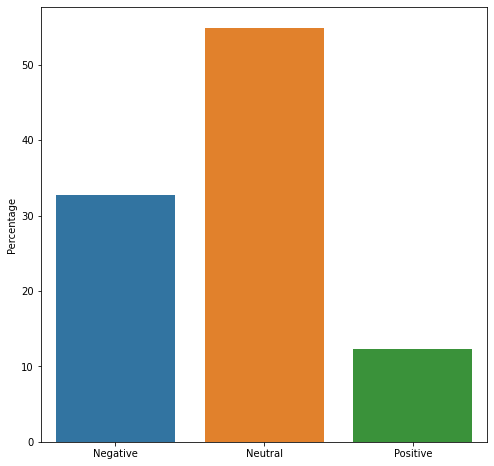

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100

sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

### Exporting the labelled-data generated. This can be used as an intelligent source to feed future models.

In [26]:
df_export = df[['headline', 'label']]

In [31]:
df_export.sample(4)

,headline,label
399,"EU 'Concerned' Over Disrupted Gas Supply, Shoo...",0
709,Woman fearing for family in Ukraine urges Cana...,-1
618,New Zealand cuts fuel tax and halves public tr...,-1
560,Slovakia meets NATO defence spending commitmen...,1


In [32]:
df_export.to_csv('reddit-headlines-labelled.csv', encoding='utf-8', index=True)